## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [1]:
from src.attractor_id.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot, accuracy, plot_loss

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_kd' for k = 2, 3, 4, 5, 6
- 'DSGRN_2d_network'
- 'iris'
- 'leslie'
- 'periodic_3labels'

In [2]:
system = 'leslie'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # threshold in (0, 1/2) used to label cubes

epochs = 20 # number of times that the data is cycled through during neural network training

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [3]:
model_filename = 'model'
model, train_loss_list, test_loss_list = train_classifier(system, N, epochs, model_filename)
accuracy = accuracy(system, model, labeling_threshold)

Epoch 1/20
Test loss: 0.507000
Train loss: 0.490000
Epoch 2/20
Test loss: 0.507000
Train loss: 0.447500
Epoch 3/20
Test loss: 0.507000
Train loss: 0.480000
Epoch 4/20
Test loss: 0.507000
Train loss: 0.535000
Epoch 5/20
Test loss: 0.507000
Train loss: 0.530000
Epoch 6/20
Test loss: 0.507000
Train loss: 0.477500
Epoch 7/20
Test loss: 0.507000
Train loss: 0.442500
Epoch 8/20
Test loss: 0.507000
Train loss: 0.517500
Epoch 9/20
Test loss: 0.507000
Train loss: 0.520000
Epoch 10/20
Test loss: 0.507000
Train loss: 0.487500
Epoch 11/20
Test loss: 0.507000
Train loss: 0.482500
Epoch 12/20
Test loss: 0.507000
Train loss: 0.475000
Epoch 13/20
Test loss: 0.507000
Train loss: 0.482500
Epoch 14/20
Test loss: 0.507000
Train loss: 0.492500
Epoch 15/20
Test loss: 0.507000
Train loss: 0.480000
Epoch 16/20
Test loss: 0.507000
Train loss: 0.470000
Epoch 17/20
Test loss: 0.507000
Train loss: 0.510000
Epoch 18/20
Test loss: 0.507000
Train loss: 0.457500
Epoch 19/20
Test loss: 0.507000
Train loss: 0.520000
Ep

### Compute homology of labeled regions of the phase space decomposition obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

ValueError: x and y must have same first dimension, but have shapes (100,) and (20,)

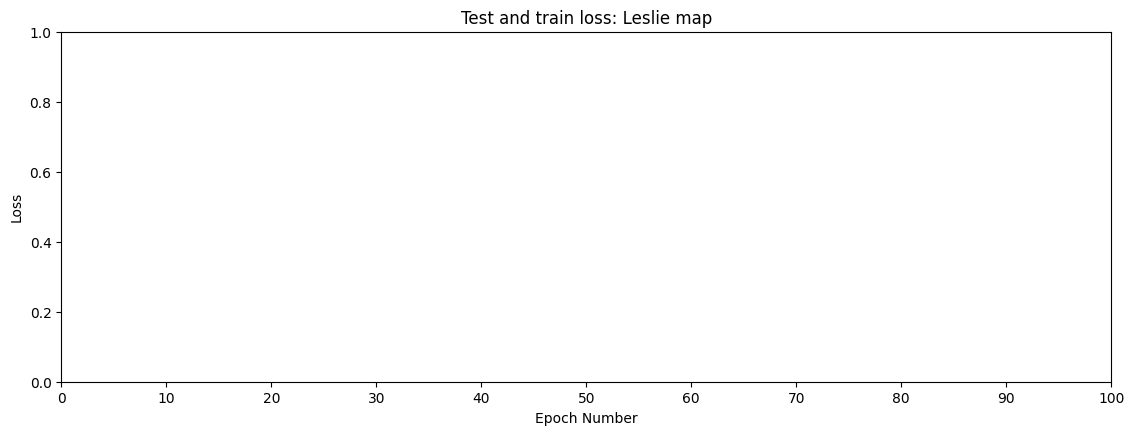

In [4]:
file_name = 'loss'
plot_loss(system, test_loss_list, train_loss_list, file_name)

In [ ]:
labeling_threshold = 0.1
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model)

Betti numbers of label 0 region: [1, 0, 0]
Label 1 region is empty.
Uncertain region is empty.
Number of cubes labeled:  121


### Produce figure of phase space decomposition

The decomposition overlays points of phase space colored according to the value of the network.

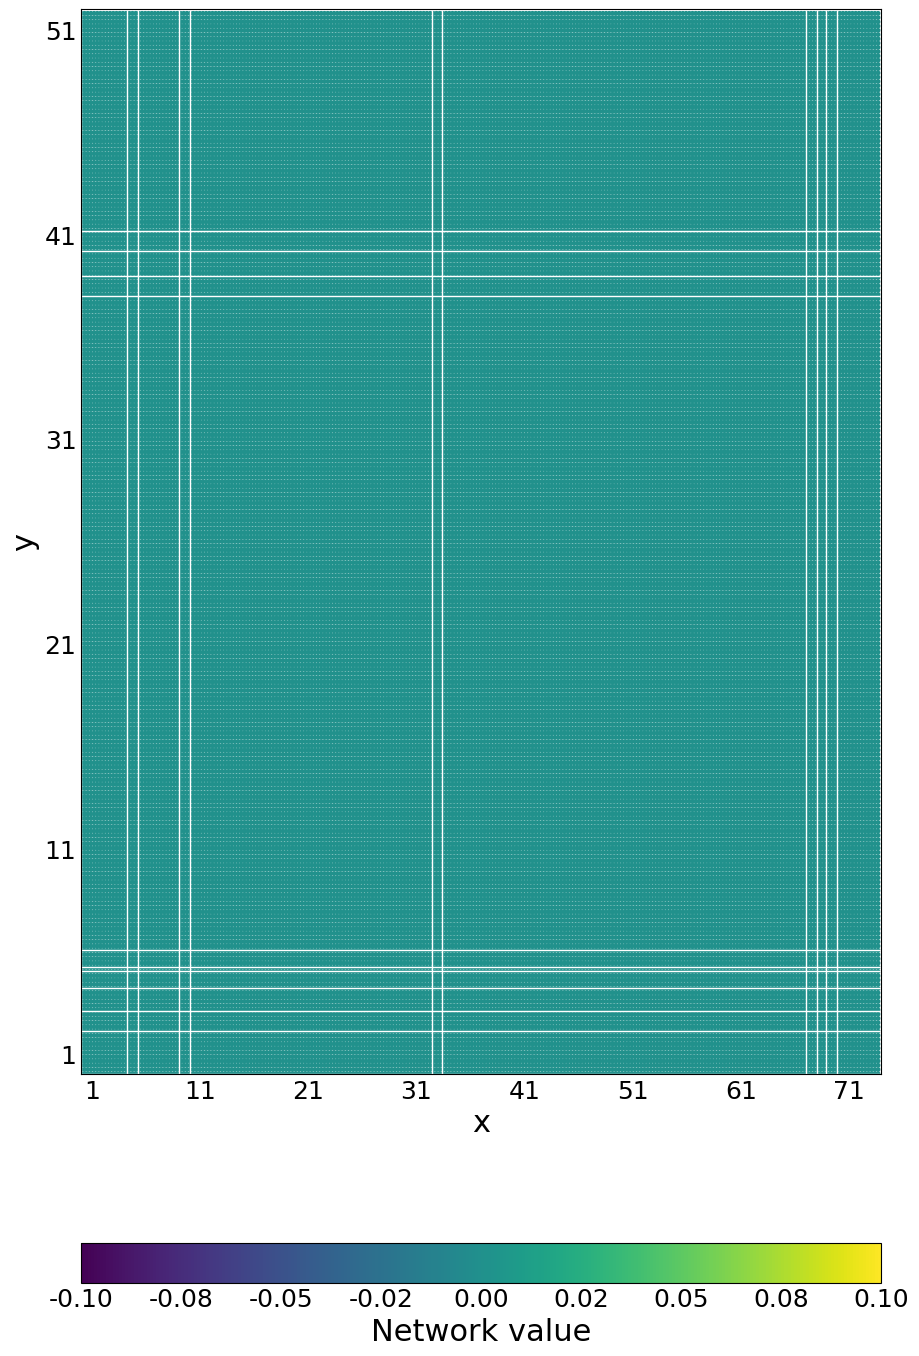

In [ ]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name)

### Produce figure of labeled cubes

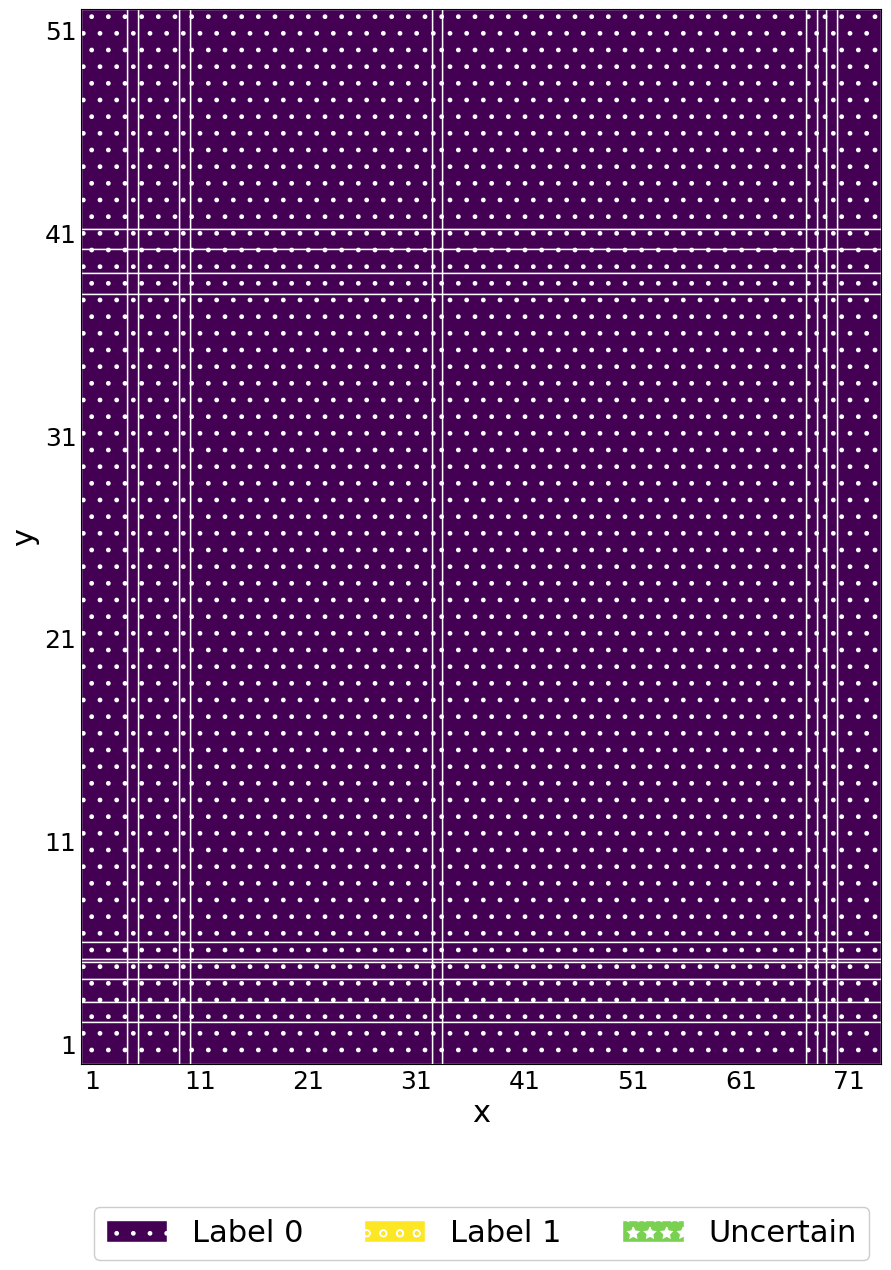

In [ ]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.